### Load Data

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [60]:
data = pd.read_csv('/Users/sauce/Desktop/DraftKings/ready_data/DraftKingsCleaned.csv', header = None)

In [61]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,﻿2017-2018 Regular Season,3/20/18,Dragan Bender,Phoenix,Detroit,H,30.27,22.88,2,1.4,...,110.6,102.6,15.8,13.9,49.0,100.8,110.6,21.01,3900,23.50
1,2017-2018 Regular Season,11/29/17,Dragan Bender,Phoenix,Detroit,R,16.27,12.62,3IN4-B2B,1.4,...,110.6,102.6,15.8,13.9,49.0,100.8,110.6,21.01,3400,10.50
2,2017-2018 Regular Season,2/23/18,Dwyane Wade,Miami,New Orleans,R,26.28,34.84,3+,0.4,...,104.0,97.8,17.3,13.3,50.2,104.5,104.0,22.27,4400,22.75
3,2017-2018 Regular Season,10/28/17,Dwyane Wade,Cleveland,New Orleans,R,23.33,28.00,2,0.5,...,109.5,100.1,17.7,12.6,49.1,110.6,109.5,22.27,5200,22.50
4,2016-2017 Regular Season,1/10/17,Miles Plumlee,Milwaukee,San Antonio,R,2.72,17.35,1,0.0,...,106.4,96.7,18.6,13.2,48.7,106.9,106.4,20.08,3000,2.00


Give columns their proper name.

In [62]:
data = data.rename(columns={0: "season", 
                        1:'game_date',
                        2: 'player',
                        3: 'team',
                        4: 'opponent',
                        5: 'venue',
                        6: 'minutes',
                        7: 'usage_rate',
                        8: 'rest',
                        9: 'avg_threes',
                        10: 'avg_reb',
                        11: 'avg_ast',
                        12: 'avg_stl',
                        13: 'avg_blk',
                        14: 'avg_tov',
                        15: 'avg_pts',
                        16: 'avg_points_vs_opp',
                        17: 'team_pace',
                        18: 'team_ast',
                        19: 'team_tov',
                        20: 'team_reb_rate',
                        21: 'team_offeff',
                        22: 'team_defeff',
                        23: 'opp_pace',
                        24: 'opp_ast',
                        25: 'opp_tov',
                        26: 'opp_reb_rate',
                        27: 'opp_offeff',
                        28: 'opp_defeff',
                        29: 'opp_pos_avg',
                        30: 'salary',
                        31: 'fantasy_points',
                       })

In [63]:
data.head()

,season,game_date,player,team,opponent,venue,minutes,usage_rate,rest,avg_threes,...,team_defeff,opp_pace,opp_ast,opp_tov,opp_reb_rate,opp_offeff,opp_defeff,opp_pos_avg,salary,fantasy_points
0,﻿2017-2018 Regular Season,3/20/18,Dragan Bender,Phoenix,Detroit,H,30.27,22.88,2,1.4,...,110.6,102.6,15.8,13.9,49.0,100.8,110.6,21.01,3900,23.50
1,2017-2018 Regular Season,11/29/17,Dragan Bender,Phoenix,Detroit,R,16.27,12.62,3IN4-B2B,1.4,...,110.6,102.6,15.8,13.9,49.0,100.8,110.6,21.01,3400,10.50
2,2017-2018 Regular Season,2/23/18,Dwyane Wade,Miami,New Orleans,R,26.28,34.84,3+,0.4,...,104.0,97.8,17.3,13.3,50.2,104.5,104.0,22.27,4400,22.75
3,2017-2018 Regular Season,10/28/17,Dwyane Wade,Cleveland,New Orleans,R,23.33,28.00,2,0.5,...,109.5,100.1,17.7,12.6,49.1,110.6,109.5,22.27,5200,22.50
4,2016-2017 Regular Season,1/10/17,Miles Plumlee,Milwaukee,San Antonio,R,2.72,17.35,1,0.0,...,106.4,96.7,18.6,13.2,48.7,106.9,106.4,20.08,3000,2.00


### Feature Engineering
I want to engineer some variables that might have significant predictive value. Each of these will be linked to the "date" variable.

In [64]:
# Change game_date to "Date_Time" format.
data["game_date"] = pd.to_datetime(data.game_date)
# Make date variable the index for time series data
data.set_index('game_date', inplace=True)
# Sort by the index
data.sort_index(inplace=True)
# Create Rolling Average of last 10 games
df_rolling = data.groupby(['player']).rolling(10).mean().rename(columns={'season':'season1', 'player':'player1'}).reset_index()
# Reset index on origional dataframe
data = data.reset_index()
# Fix column names
df_rolling = df_rolling.drop(columns=['player'])
df_rolling = df_rolling.rename(columns = {'season1': 'season', 'player1': 'player'})
# # Merge Dataframes
data = pd.merge(data, df_rolling, on=['player', 'season', 'game_date'], left_index= True , suffixes=['', '_AVG10'])

In [65]:
# Change game_date to "Date_Time" format.
data["game_date"] = pd.to_datetime(data.game_date)
# Make date variable the index for time series data
data.set_index('game_date', inplace=True)
# Sort by the index
data.sort_index(inplace=True)
# Create Rolling Average of last 10 games
df_rolling = data.groupby(['player']).rolling(3).mean().rename(columns={'season':'season1', 'player':'player1'}).reset_index()
# Reset index on origional dataframe
data = data.reset_index()
# Fix column names
df_rolling = df_rolling.drop(columns=['player'])
df_rolling = df_rolling.rename(columns = {'season1': 'season', 'player1': 'player'})
# # Merge Dataframes
df = pd.merge(data, df_rolling, on=['player', 'season', 'game_date'], left_index= True , suffixes=['', '_AVG3'])

In [66]:
df

,game_date,season,player,team,opponent,venue,minutes,usage_rate,rest,avg_threes,...,team_defeff_AVG10_AVG3,opp_pace_AVG10_AVG3,opp_ast_AVG10_AVG3,opp_tov_AVG10_AVG3,opp_reb_rate_AVG10_AVG3,opp_offeff_AVG10_AVG3,opp_defeff_AVG10_AVG3,opp_pos_avg_AVG10_AVG3,salary_AVG10_AVG3,fantasy_points_AVG10_AVG3
36550,2016-10-25,2016-2017 Regular Season,Rodney Hood,Utah,Portland,R,37.65,23.76,3+,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,2016-10-25,2016-2017 Regular Season,David Lee,San Antonio,Golden State,R,11.13,24.04,3+,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28640,2016-10-25,2016-2017 Regular Season,Manu Ginobili,San Antonio,Golden State,R,20.87,18.63,3+,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35913,2016-10-25,2016-2017 Regular Season,Richard Jefferson,Cleveland,New York,H,25.78,15.67,3+,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,2016-10-25,2016-2017 Regular Season,Al-Farouq Aminu,Portland,Utah,H,28.40,12.87,3+,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41796,2016-10-25,2016-2017 Regular Season,Tony Parker,San Antonio,Golden State,R,26.47,16.16,3+,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34276,2016-10-25,2016-2017 Regular Season,Patty Mills,San Antonio,Golden State,R,17.85,19.61,3+,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25689,2016-10-25,2016-2017 Regular Season,Kyle Anderson,San Antonio,Golden State,R,22.40,1.74,3+,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7399,2016-10-25,2016-2017 Regular Season,Damian Lillard,Portland,Utah,H,35.42,38.79,3+,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37259,2016-10-25,2016-2017 Regular Season,Rudy Gobert,Utah,Portland,R,40.95,13.38,3+,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm going to remove many of the columns that likely wont add predictive value. My decision making process for which variables to include comes from domain knowledge about basketball statistics. Also, we'll need to remove all variables of "avg_10_avg_3" style.

In [67]:
df.columns.values

array(['game_date', 'season', 'player', 'team', 'opponent', 'venue',
       'minutes', 'usage_rate', 'rest', 'avg_threes', 'avg_reb',
       'avg_ast', 'avg_stl', 'avg_blk', 'avg_tov', 'avg_pts',
       'avg_points_vs_opp', 'team_pace', 'team_ast', 'team_tov',
       'team_reb_rate', 'team_offeff', 'team_defeff', 'opp_pace',
       'opp_ast', 'opp_tov', 'opp_reb_rate', 'opp_offeff', 'opp_defeff',
       'opp_pos_avg', 'salary', 'fantasy_points', 'team_AVG10',
       'opponent_AVG10', 'venue_AVG10', 'minutes_AVG10',
       'usage_rate_AVG10', 'rest_AVG10', 'avg_threes_AVG10',
       'avg_reb_AVG10', 'avg_ast_AVG10', 'avg_stl_AVG10', 'avg_blk_AVG10',
       'avg_tov_AVG10', 'avg_pts_AVG10', 'avg_points_vs_opp_AVG10',
       'team_pace_AVG10', 'team_ast_AVG10', 'team_tov_AVG10',
       'team_reb_rate_AVG10', 'team_offeff_AVG10', 'team_defeff_AVG10',
       'opp_pace_AVG10', 'opp_ast_AVG10', 'opp_tov_AVG10',
       'opp_reb_rate_AVG10', 'opp_offeff_AVG10', 'opp_defeff_AVG10',
       'opp_p

In [68]:
# Drop columns that are of no use 
df = df.drop(columns=['team_AVG10','opponent_AVG10','venue_AVG10','rest_AVG10',
                      'avg_threes_AVG10','avg_reb_AVG10','avg_ast_AVG10','avg_stl_AVG10',
                      'avg_blk_AVG10','avg_tov_AVG10','avg_pts_AVG10','avg_points_vs_opp_AVG10',
                      'team_pace_AVG10','team_ast_AVG10','team_tov_AVG10','team_reb_rate_AVG10',
                      'team_defeff_AVG10','opp_pace_AVG10','opp_ast_AVG10','opp_tov_AVG10',
                      'opp_reb_rate_AVG10','opp_offeff_AVG10','salary_AVG10',
                      'team_AVG3', 'opponent_AVG3', 'venue_AVG3','rest_AVG3',
                      'avg_threes_AVG3', 'avg_reb_AVG3','avg_ast_AVG3', 'avg_stl_AVG3', 
                      'avg_blk_AVG3', 'avg_tov_AVG3','avg_pts_AVG3', 
                      'avg_points_vs_opp_AVG3', 'team_pace_AVG3','team_ast_AVG3', 
                      'team_tov_AVG3', 'team_reb_rate_AVG3','team_defeff_AVG3', 
                      'opp_pace_AVG3','opp_ast_AVG3', 'opp_tov_AVG3', 'opp_reb_rate_AVG3',
                      'opp_offeff_AVG3', 'opp_pos_avg_AVG3','salary_AVG3',
                      'team_AVG10_AVG3','opponent_AVG10_AVG3', 'venue_AVG10_AVG3', 
                      'minutes_AVG10_AVG3','usage_rate_AVG10_AVG3', 'rest_AVG10_AVG3',
                      'avg_threes_AVG10_AVG3', 'avg_reb_AVG10_AVG3',
                      'avg_ast_AVG10_AVG3', 'avg_stl_AVG10_AVG3', 'avg_blk_AVG10_AVG3',
                      'avg_tov_AVG10_AVG3', 'avg_pts_AVG10_AVG3',
                      'avg_points_vs_opp_AVG10_AVG3', 'team_pace_AVG10_AVG3',
                      'team_ast_AVG10_AVG3', 'team_tov_AVG10_AVG3',
                      'team_reb_rate_AVG10_AVG3', 'team_offeff_AVG10_AVG3',
                      'team_defeff_AVG10_AVG3', 'opp_pace_AVG10_AVG3',
                      'opp_ast_AVG10_AVG3', 'opp_tov_AVG10_AVG3',
                      'opp_reb_rate_AVG10_AVG3', 'opp_offeff_AVG10_AVG3',
                      'opp_defeff_AVG10_AVG3', 'opp_pos_avg_AVG10_AVG3',
                      'salary_AVG10_AVG3', 'fantasy_points_AVG10_AVG3'])

In [69]:
df.columns.values

array(['game_date', 'season', 'player', 'team', 'opponent', 'venue',
       'minutes', 'usage_rate', 'rest', 'avg_threes', 'avg_reb',
       'avg_ast', 'avg_stl', 'avg_blk', 'avg_tov', 'avg_pts',
       'avg_points_vs_opp', 'team_pace', 'team_ast', 'team_tov',
       'team_reb_rate', 'team_offeff', 'team_defeff', 'opp_pace',
       'opp_ast', 'opp_tov', 'opp_reb_rate', 'opp_offeff', 'opp_defeff',
       'opp_pos_avg', 'salary', 'fantasy_points', 'minutes_AVG10',
       'usage_rate_AVG10', 'team_offeff_AVG10', 'opp_defeff_AVG10',
       'opp_pos_avg_AVG10', 'fantasy_points_AVG10', 'minutes_AVG3',
       'usage_rate_AVG3', 'team_offeff_AVG3', 'opp_defeff_AVG3',
       'fantasy_points_AVG3'], dtype=object)

### Missing Values

There are missing values in for the rolling average columns. This is because when there arent 3 or 10 games to draw from, a null is inserted. I'm going to replace the nulls by the mean for each player and seaso for the given origional metric.

In [70]:
df.columns[df.isnull().any()]

Index(['minutes_AVG10', 'usage_rate_AVG10', 'team_offeff_AVG10',
       'opp_defeff_AVG10', 'opp_pos_avg_AVG10', 'fantasy_points_AVG10',
       'minutes_AVG3', 'usage_rate_AVG3', 'team_offeff_AVG3',
       'opp_defeff_AVG3', 'fantasy_points_AVG3'],
      dtype='object')

In [71]:
df.isnull().sum()

game_date                  0
season                     0
player                     0
team                       0
opponent                   0
venue                      0
minutes                    0
usage_rate                 0
rest                       0
avg_threes                 0
avg_reb                    0
avg_ast                    0
avg_stl                    0
avg_blk                    0
avg_tov                    0
avg_pts                    0
avg_points_vs_opp          0
team_pace                  0
team_ast                   0
team_tov                   0
team_reb_rate              0
team_offeff                0
team_defeff                0
opp_pace                   0
opp_ast                    0
opp_tov                    0
opp_reb_rate               0
opp_offeff                 0
opp_defeff                 0
opp_pos_avg                0
salary                     0
fantasy_points             0
minutes_AVG10           4754
usage_rate_AVG10        4754
team_offeff_AV

In [72]:
df['fantasy_points_AVG3'] = df['fantasy_points_AVG3'].fillna(df.groupby(['player', 'season'])['fantasy_points'].transform('mean'))
df['opp_defeff_AVG3'] = df['opp_defeff_AVG3'].fillna(df.groupby(['opponent', 'season'])['opp_defeff'].transform('mean'))
df['team_offeff_AVG3'] = df['team_offeff_AVG3'].fillna(df.groupby(['team', 'season'])['team_offeff'].transform('mean'))
df['usage_rate_AVG3'] = df['usage_rate_AVG3'].fillna(df.groupby(['player', 'season'])['usage_rate'].transform('mean'))
df['fantasy_points_AVG10'] = df['fantasy_points_AVG10'].fillna(df.groupby(['player', 'season'])['fantasy_points'].transform('mean'))
df['minutes_AVG3'] = df['minutes_AVG3'].fillna(df.groupby(['player', 'season'])['minutes'].transform('mean'))
df['opp_pos_avg_AVG10'] = df['opp_pos_avg_AVG10'].fillna(df.groupby(['opponent', 'season'])['opp_pos_avg'].transform('mean'))
df['opp_defeff_AVG10'] = df['opp_defeff_AVG10'].fillna(df.groupby(['opponent', 'season'])['opp_defeff'].transform('mean'))
df['team_offeff_AVG10'] = df['team_offeff_AVG10'].fillna(df.groupby(['team', 'season'])['team_offeff'].transform('mean'))
df['usage_rate_AVG10'] = df['usage_rate_AVG10'].fillna(df.groupby(['player', 'season'])['usage_rate'].transform('mean'))
df['minutes_AVG10'] = df['minutes_AVG10'].fillna(df.groupby(['player', 'season'])['minutes'].transform('mean'))

In [73]:
df.isnull().sum()

game_date               0
season                  0
player                  0
team                    0
opponent                0
venue                   0
minutes                 0
usage_rate              0
rest                    0
avg_threes              0
avg_reb                 0
avg_ast                 0
avg_stl                 0
avg_blk                 0
avg_tov                 0
avg_pts                 0
avg_points_vs_opp       0
team_pace               0
team_ast                0
team_tov                0
team_reb_rate           0
team_offeff             0
team_defeff             0
opp_pace                0
opp_ast                 0
opp_tov                 0
opp_reb_rate            0
opp_offeff              0
opp_defeff              0
opp_pos_avg             0
salary                  0
fantasy_points          0
minutes_AVG10           0
usage_rate_AVG10        0
team_offeff_AVG10       0
opp_defeff_AVG10        0
opp_pos_avg_AVG10       0
fantasy_points_AVG10    0
minutes_AVG3

### Limiting Data to Predictive Variables

Now that I've finished with feature engineering and cleaning the data, I'm going to remove all of the remaining variables that don't have predictive value, or variables that we won't have access to when predicting on new data before the games are played.

In [74]:
df.columns.values

array(['game_date', 'season', 'player', 'team', 'opponent', 'venue',
       'minutes', 'usage_rate', 'rest', 'avg_threes', 'avg_reb',
       'avg_ast', 'avg_stl', 'avg_blk', 'avg_tov', 'avg_pts',
       'avg_points_vs_opp', 'team_pace', 'team_ast', 'team_tov',
       'team_reb_rate', 'team_offeff', 'team_defeff', 'opp_pace',
       'opp_ast', 'opp_tov', 'opp_reb_rate', 'opp_offeff', 'opp_defeff',
       'opp_pos_avg', 'salary', 'fantasy_points', 'minutes_AVG10',
       'usage_rate_AVG10', 'team_offeff_AVG10', 'opp_defeff_AVG10',
       'opp_pos_avg_AVG10', 'fantasy_points_AVG10', 'minutes_AVG3',
       'usage_rate_AVG3', 'team_offeff_AVG3', 'opp_defeff_AVG3',
       'fantasy_points_AVG3'], dtype=object)

In [75]:
# Copy data into new frame
# Remove unhelpful variables.
df2 = df.drop(columns=['game_date', 'season', 'player', 'team', 'opponent',
                     'minutes', 'usage_rate', 'salary'])

In [76]:
# Check out new data
df2.head()

,venue,rest,avg_threes,avg_reb,avg_ast,avg_stl,avg_blk,avg_tov,avg_pts,avg_points_vs_opp,...,usage_rate_AVG10,team_offeff_AVG10,opp_defeff_AVG10,opp_pos_avg_AVG10,fantasy_points_AVG10,minutes_AVG3,usage_rate_AVG3,team_offeff_AVG3,opp_defeff_AVG3,fantasy_points_AVG3
36550,R,3+,1.9,3.4,1.6,0.6,0.2,1.1,12.7,28.88,...,23.134237,107.4,106.395380,21.017840,21.444915,27.003390,23.134237,107.4,106.395380,21.444915
8700,R,3+,0.0,5.6,1.6,0.4,0.5,1.0,7.3,17.33,...,16.902532,108.8,106.620901,20.049962,17.990506,18.695063,16.902532,108.8,106.620901,17.990506
28640,R,3+,1.3,2.3,2.7,1.2,0.2,1.4,7.5,21.58,...,20.644203,108.8,106.620901,20.049962,17.105072,18.715362,20.644203,108.8,106.620901,17.105072
35913,H,3+,0.8,2.6,1.0,0.3,0.1,0.7,5.7,14.63,...,12.547436,110.9,106.278244,21.102097,11.349359,20.437308,12.547436,110.9,106.278244,11.349359
557,H,3+,1.1,7.4,1.6,1.0,0.7,1.5,8.7,19.17,...,15.557167,107.8,106.723942,18.473981,23.654167,28.926000,15.557167,107.8,106.723942,23.654167


### Correlations

Let's check out a coorelation matrix of our data.

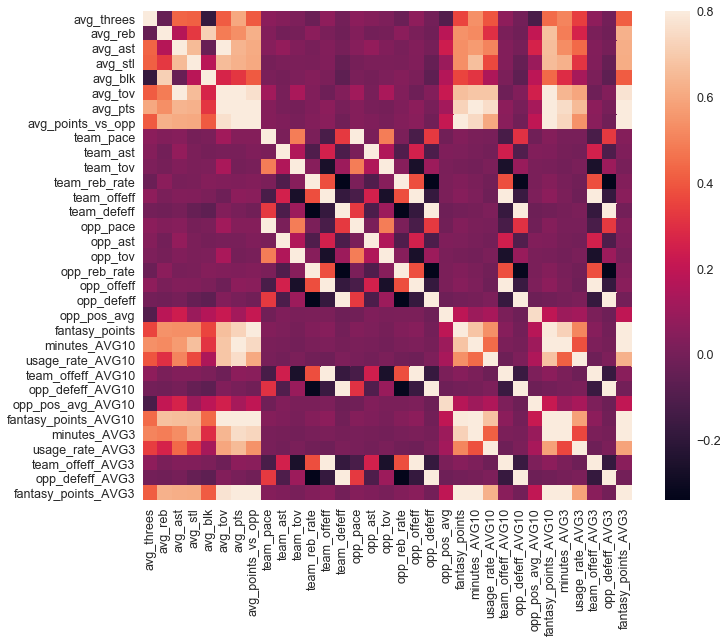

In [77]:
corrmatrix = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

This is a beautiful graph, but it's hard to interprete. In the next plot let's look at the 10 variables that are the most strongly coorelated with our target variable.

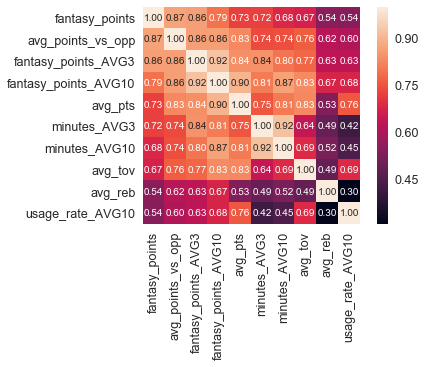

In [78]:
k = 10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'fantasy_points')['fantasy_points'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Unsurprisingly, the features that we engineered from the target variable are the most strongly coorelated with the target variable.

### Prepare for Machine Learning Models

We need to make sure the data types are all accurate, and then one hot encode the categorical variables, so they can be used in our regression model.

In [79]:
df2.dtypes

venue                    object
rest                     object
avg_threes              float64
avg_reb                 float64
avg_ast                 float64
avg_stl                 float64
avg_blk                 float64
avg_tov                 float64
avg_pts                 float64
avg_points_vs_opp       float64
team_pace               float64
team_ast                float64
team_tov                float64
team_reb_rate           float64
team_offeff             float64
team_defeff             float64
opp_pace                float64
opp_ast                 float64
opp_tov                 float64
opp_reb_rate            float64
opp_offeff              float64
opp_defeff              float64
opp_pos_avg             float64
fantasy_points          float64
minutes_AVG10           float64
usage_rate_AVG10        float64
team_offeff_AVG10       float64
opp_defeff_AVG10        float64
opp_pos_avg_AVG10       float64
fantasy_points_AVG10    float64
minutes_AVG3            float64
usage_ra

In [80]:
# Encode Dummies
df2 = pd.get_dummies(df2, columns=['venue', 'rest'], drop_first=True)

In [81]:
df2.head()

,avg_threes,avg_reb,avg_ast,avg_stl,avg_blk,avg_tov,avg_pts,avg_points_vs_opp,team_pace,team_ast,...,fantasy_points_AVG3,venue_R,rest_2,rest_3+,rest_3IN4,rest_3IN4-B2B,rest_4IN5,rest_4IN5-B2B,rest_5IN5-B2B2B,rest_B2B
36550,1.9,3.4,1.6,0.6,0.2,1.1,12.7,28.88,93.6,16.3,...,21.444915,1,0,1,0,0,0,0,0,0
8700,0.0,5.6,1.6,0.4,0.5,1.0,7.3,17.33,96.4,18.2,...,17.990506,1,0,1,0,0,0,0,0,0
28640,1.3,2.3,2.7,1.2,0.2,1.4,7.5,21.58,96.4,18.2,...,17.105072,1,0,1,0,0,0,0,0,0
35913,0.8,2.6,1.0,0.3,0.1,0.7,5.7,14.63,98.4,17.2,...,11.349359,0,0,1,0,0,0,0,0,0
557,1.1,7.4,1.6,1.0,0.7,1.5,8.7,19.17,99.1,16.1,...,23.654167,0,0,1,0,0,0,0,0,0


In [82]:
# Grab Target Variable and remove it from data.
y = df2['fantasy_points']
X = df2.drop(columns = ['fantasy_points'])

In [83]:
# Split data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
# Scale data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Multiple Linear Regression

I want to try a simple MLR with Backwards Selection to begin with.

In [85]:
# Fit Model
from sklearn.linear_model import LinearRegression
Mregressor = LinearRegression()
Mregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
# Make Predictions
y_pred = Mregressor.predict(X_test)

In [ ]:
# Check Mean Squared Error
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 33.983600684951256


In [ ]:
accuracies = cross_val_score(estimator = Mregressor, X = X_train, y = y_train, cv = 10, n_jobs = -1)
accuracies.mean()

### Lasso Regression

In [162]:
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
y_pred2 = reg.predict(X_test)

In [158]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))

Mean Squared Error: 38.40956336940307


## Random Forest Regression

In [164]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0, n_jobs = -1) 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [166]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10, n_jobs = -1)
accuracies.mean()

0.8086395205800153

### Grid Search for Random Forest

In [169]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[100, 300, 500],
               'min_samples_split': [2,4,6],
              'min_samples_leaf' : [1,2,3]}]

In [ ]:
grid_search = GridSearchCV(estimator = regressor, 
                           param_grid = parameters,
                           scoring ='r2',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

In [173]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [174]:
print(best_accuracy)

0.8114839183166225


In [175]:
print(best_parameters)

{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [177]:
# Update Parameters
regressor = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 3,  random_state = 0, n_jobs = -1, min_samples_split = 2) 
regressor.fit(X_train, y_train)
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10, n_jobs = -1)
accuracies.mean()

0.8114839183166225

In [178]:
RF_pred = regressor.predict(X_test)

In [179]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_pred))

Mean Squared Error: 36.5373911589859


### XGBoost

In [31]:
import xgboost as boost

In [32]:
model_boost = boost.XGBRegressor()
model_boost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [190]:
boost_pred = model_boost.predict(X_test)

In [191]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_pred))

Mean Squared Error: 36.5373911589859


In [192]:
accuracies = cross_val_score(estimator = model_boost, X = X_train, y = y_train, cv = 10, n_jobs = -1)
accuracies.mean()

0.8212818479421417

### Grid Search for XGBoost

In [34]:
# Grid Search for XGBoost
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint, uniform

parameters = [{'learning_rate': [.0001, .001, .01, .05],
               'booster': ['gbtree','gblinear', 'dart'],
               'reg_alpha': [0, 0.5],
               'reg_lambda': [0.5, 1]
              }]
 
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = parameters,
                           scoring ='r2',
                           cv = 10,
                           n_jobs = -1)
 
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [35]:
print(best_accuracy)

0.8152305227718272


In [36]:
print(best_parameters)

{'booster': 'dart', 'learning_rate': 0.05, 'reg_alpha': 0, 'reg_lambda': 0.5}


### Recursive Feature Elimination and K-Fold Validation for XGBoost

In [40]:
# Recursive Feature Elimination and K-Fold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
XGBf = boost.XGBRegressor(booster = 'dart', learning_rate = 0.05, reg_alpha = 0, reg_lambda = 0.5)

rfecv = RFECV(estimator=XGBf,
              scoring='r2')
rfecv.fit(X, y)

rfecv.ranking_

array([32,  1,  1,  2,  7,  1,  1,  1,  6,  9, 11,  1, 15, 17, 19, 21, 23,
       25, 27, 29, 31, 30, 28, 26, 24, 22,  1,  1,  5,  4,  3,  1,  1,  8,
       10, 12, 13, 14, 16, 18, 20])

In [41]:
rfecv.support_ 

array([False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False])

As shown above, the rfecv function only found 9 variables useful for making predictions. Below is the XGBoost model run with the 9 variables alone.

In [46]:
# Put relevant variables into new dataset
df_rec = rfecv.transform(X)

In [49]:
# Re-Split data into train and test with new variables included
X_Tr, X_Te, y_Tr, y_Te = train_test_split(df_rec, y, test_size = 0.2, random_state = 0)

In [53]:
# Fit tuned model on new data
model_rfecv = boost.XGBRegressor(booster = 'dart', learning_rate = 0.05, reg_alpha = 0, reg_lambda = 0.5)
model_rfecv.fit(X_Tr, y_Tr)
# Make predictions
rfecv_pred = model_rfecv.predict(X_Te)
# Check accuracy
print('Mean Squared Error:', metrics.mean_squared_error(y_Te, rfecv_pred))

Mean Squared Error: 36.09696636921127


In [56]:
# Cross Validation
acc_rfecv = cross_val_score(estimator = model_rfecv, X = X_Tr, y = y_Tr, cv = 10, n_jobs = -1)
acc_rfecv.mean()

0.815243441604277

This yielded a similar, but slightly worse accuracy with the cross validation